# Reading data

In [1]:
import pandas as pd

In [2]:
data = pd.read_csv("spam.csv", encoding = "ISO-8859-1")

In [3]:
data.head(n=10)

v1                                                 v2 Unnamed: 2  \
0   ham  Go until jurong point, crazy.. Available only ...        NaN   
1   ham                      Ok lar... Joking wif u oni...        NaN   
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...        NaN   
3   ham  U dun say so early hor... U c already then say...        NaN   
4   ham  Nah I don't think he goes to usf, he lives aro...        NaN   
5  spam  FreeMsg Hey there darling it's been 3 week's n...        NaN   
6   ham  Even my brother is not like to speak with me. ...        NaN   
7   ham  As per your request 'Melle Melle (Oru Minnamin...        NaN   
8  spam  WINNER!! As a valued network customer you have...        NaN   
9  spam  Had your mobile 11 months or more? U R entitle...        NaN   

  Unnamed: 3 Unnamed: 4  
0        NaN        NaN  
1        NaN        NaN  
2        NaN        NaN  
3        NaN        NaN  
4        NaN        NaN  
5        NaN        NaN  
6        NaN        NaN  
7        NaN        NaN  
8        NaN        NaN  
9        NaN        NaN

In [4]:
data['v2'][2]

"Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's"

# Data Analysis

In [5]:
data.v1.value_counts()

ham     4825
spam     747
Name: v1, dtype: int64

In [6]:
data.v2[5570] #spam data example

"The guy did some bitching but I acted like i'd be interested in buying something else next week and he gave it to us for free"

<AxesSubplot:>

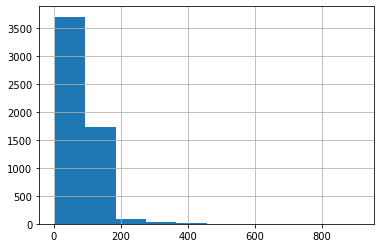

In [7]:
data['v2'].str.len().hist()

<AxesSubplot:>

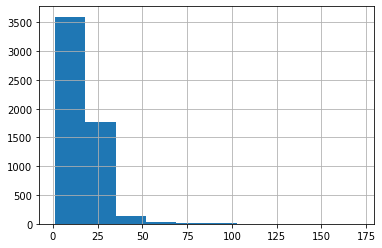

In [8]:
data['v2'].str.split().map(lambda x : len(x)).hist()

all_numbers = [1,2,3,4,5,6,7,8]

def check_even(x):
    return x%2==0

lambda x: x%2 == 0

even = map(check_even,all_numbers)

The movie was very good. -- Positive
I didn't like the movie.

# Data Cleaning

In [9]:
import nltk
from nltk.tokenize import word_tokenize
import string
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
porter = PorterStemmer()
stop_words = set(stopwords.words('english'))

In [10]:
data

v1                                                 v2 Unnamed: 2  \
0      ham  Go until jurong point, crazy.. Available only ...        NaN   
1      ham                      Ok lar... Joking wif u oni...        NaN   
2     spam  Free entry in 2 a wkly comp to win FA Cup fina...        NaN   
3      ham  U dun say so early hor... U c already then say...        NaN   
4      ham  Nah I don't think he goes to usf, he lives aro...        NaN   
...    ...                                                ...        ...   
5567  spam  This is the 2nd time we have tried 2 contact u...        NaN   
5568   ham              Will Ì_ b going to esplanade fr home?        NaN   
5569   ham  Pity, * was in mood for that. So...any other s...        NaN   
5570   ham  The guy did some bitching but I acted like i'd...        NaN   
5571   ham                         Rofl. Its true to its name        NaN   

     Unnamed: 3 Unnamed: 4  
0           NaN        NaN  
1           NaN        NaN  
2           NaN        NaN  
3           NaN        NaN  
4           NaN        NaN  
...         ...        ...  
5567        NaN        NaN  
5568        NaN        NaN  
5569        NaN        NaN  
5570        NaN        NaN  
5571        NaN        NaN  

[5572 rows x 5 columns]

In [11]:
columns_to_drop = ['Unnamed: 2',"Unnamed: 3","Unnamed: 4"]
data.drop(columns_to_drop,inplace=True, axis=1)

In [12]:
data

v1                                                 v2
0      ham  Go until jurong point, crazy.. Available only ...
1      ham                      Ok lar... Joking wif u oni...
2     spam  Free entry in 2 a wkly comp to win FA Cup fina...
3      ham  U dun say so early hor... U c already then say...
4      ham  Nah I don't think he goes to usf, he lives aro...
...    ...                                                ...
5567  spam  This is the 2nd time we have tried 2 contact u...
5568   ham              Will Ì_ b going to esplanade fr home?
5569   ham  Pity, * was in mood for that. So...any other s...
5570   ham  The guy did some bitching but I acted like i'd...
5571   ham                         Rofl. Its true to its name

[5572 rows x 2 columns]

import nltk
from nltk.tokenize import word_tokenize, sent_tokenize

word_tokenized = word_tokenize("This sentence should be word tokenized.")
sent_tokenized = sent_tokenize("This is first sentence, This is scond sentence.")

!pip install spacy

from spacy.lang.en import English
nlp = English()
tokens = nlp("This sentence should be tokenized.")
tokens_text = [t.text for t in tokens]

tokens_text

word_tokenized

In [13]:
def clean_text(text):
    """
    To clean a textual data
    params: text : str
    return final_text : str
    """
    # remove punctuations from text
    punctuations_removed = text.translate(str.maketrans('', '', string.punctuation))
    tokens = word_tokenize(punctuations_removed)
    # convert to lower case
    tokens = [w.lower() for w in tokens]
    # remove punctuation from each word
    table = str.maketrans('', '', string.punctuation)
    stripped = [w.translate(table) for w in tokens]
    # remove remaining tokens that are not alphabetic
    words = [word for word in stripped if word.isalpha()]
    # filter out stop words
    words = [w for w in words if not w in stop_words]
    #stemming the tokens
    stemmed = [porter.stem(word) for word in words]
    final_text = ' '.join(stemmed)
    return final_text

## Stemming 
playing --> play


## Lemmatization
{
"played":"play",
"playing":"play"
}


played --> lemma

In [14]:
data['v2'] = data['v2'].apply(clean_text)

In [15]:
data

v1                                                 v2
0      ham  go jurong point crazi avail bugi n great world...
1      ham                              ok lar joke wif u oni
2     spam  free entri wkli comp win fa cup final tkt may ...
3      ham                u dun say earli hor u c alreadi say
4      ham          nah dont think goe usf live around though
...    ...                                                ...
5567  spam  time tri contact u u pound prize claim easi ca...
5568   ham                            ì b go esplanad fr home
5569   ham                            piti mood soani suggest
5570   ham  guy bitch act like id interest buy someth els ...
5571   ham                                     rofl true name

[5572 rows x 2 columns]

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelBinarizer, LabelEncoder
from sklearn import metrics
from sklearn.svm import SVC

In [17]:
X_train, X_test, y_train, y_test = train_test_split(data['v2'], data['v1'], test_size = 0.2, random_state = 2)

In [18]:
X_train_df = X_train.to_frame()
y_train_df = y_train.to_frame()
X_test_df = X_test.to_frame()
y_test_df = y_test.to_frame()

In [19]:
train_df =pd.merge(X_train_df, y_train_df, right_index = True, 
               left_index = True)
test_df =pd.merge(X_test_df, y_test_df, right_index = True, 
               left_index = True)

In [20]:
train_df

v2   v1
3890              problem spend lot qualiti time togeth  ham
5553                                hahahaus brain dear  ham
4366        like di sweater fr mango size alreadi irrit  ham
3968  thank messag realli appreci sacrific im sure p...  ham
3771                           uncl timi help clear car  ham
...                                                 ...  ...
3335                               u go back urself lor  ham
1099  ne thing interest good birthday u wrking nxt s...  ham
2514                         ok ill send ltdecimalgt ok  ham
3606                                               idea  ham
2575                                 that go ruin thesi  ham

[4457 rows x 2 columns]

In [21]:
Encoder = LabelEncoder()
y_train = Encoder.fit_transform(y_train)
y_test = Encoder.fit_transform(y_test)

In [22]:
X_test

5086             omg one thing anoth cat worm bad day end
2120    argh spotti anyway thing rememb research provi...
2318                                         way offic da
2917                                 thank chikku gud nyt
1352    let ur heart ur compass ur mind ur map ur soul...
                              ...                        
884     yoyyooo u know chang permiss drive mac usb fla...
3821                                               normal
1066                                   free call sir wait
208     pleas give us connect today ltdecimalgt refund...
1378                                ya tel wat ur problem
Name: v2, Length: 1115, dtype: object

# converting text to numerical representation


In [23]:
Tfidf_vect = TfidfVectorizer(max_features=5000)
Tfidf_vect.fit(data['v2'])
X_train = Tfidf_vect.transform(X_train)
X_test = Tfidf_vect.transform(X_test)

# Saving vectorizer to use for other data



In [24]:
import pickle
pickle.dump(Tfidf_vect, open("models/tfidf_vectorizer.pkl", "wb"))

# Building SVC classifier

In [25]:
classifier = SVC()

# Training the classifier



In [26]:
import time
start_time = time.time()
classifier.fit(X_train, y_train)
end_time = time.time()
training_time = end_time - start_time

In [27]:
training_time

1.3962507247924805

In [28]:
y_pred = classifier.predict(X_test)

In [29]:
y_pred

array([0, 0, 0, ..., 0, 0, 0])

## Adding SVM prediction to result_test_data.csv file

In [30]:
test_result_data = pd.read_csv("results/result_testing_data_imbalanced_data.csv")
svm_predictions = y_pred.tolist()
test_result_data['SVM prediction'] = svm_predictions
test_result_data.to_csv("results/test_result_data_with_SVM_NaiveBayes_imbalanced_data.csv")

In [31]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))


Accuracy: 0.9641255605381166


In [32]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98       957
           1       1.00      0.75      0.86       158

    accuracy                           0.96      1115
   macro avg       0.98      0.87      0.92      1115
weighted avg       0.97      0.96      0.96      1115



# Saving model

In [33]:
import pickle
pickle.dump(classifier, open("models/SVM_spam_classification_model_imbalanced_data", 'wb'))
 

## Visualizing evaluation metrics

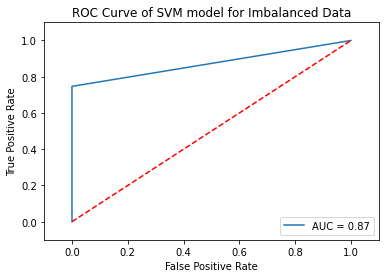

In [34]:
import matplotlib.pyplot as plt
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred)

auc_score = metrics.auc(fpr, tpr)

# clear current figure
plt.clf()

plt.title('ROC Curve of SVM model for Imbalanced Data')
plt.plot(fpr, tpr, label='AUC = {:.2f}'.format(auc_score))

# it's helpful to add a diagonal to indicate where chance 
# scores lie (i.e. just flipping a coin)
plt.plot([0,1],[0,1],'r--')

plt.xlim([-0.1,1.1])
plt.ylim([-0.1,1.1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

plt.legend(loc='lower right')
plt.savefig('results/svm_roc_imbalanced_data.jpg')
plt.show()


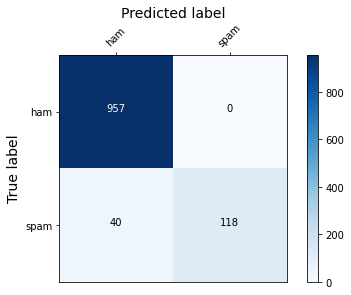

In [35]:
import itertools
import numpy as np
matrix = confusion_matrix(y_test,y_pred)

plt.clf()

# place labels at the top
plt.gca().xaxis.tick_top()
plt.gca().xaxis.set_label_position('top')

# plot the matrix per se
plt.imshow(matrix, interpolation='nearest', cmap=plt.cm.Blues)

# plot colorbar to the right
plt.colorbar()

fmt = 'd'

# write the number of predictions in each bucket
thresh = matrix.max() / 2.
for i, j in itertools.product(range(matrix.shape[0]), range(matrix.shape[1])):

    # if background is dark, use a white number, and vice-versa
    plt.text(j, i, format(matrix[i, j], fmt),
         horizontalalignment="center",
         color="white" if matrix[i, j] > thresh else "black")

class_names = ['ham','spam']
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names, rotation=45)
plt.yticks(tick_marks, class_names)
plt.tight_layout()
plt.ylabel('True label',size=14)
plt.xlabel('Predicted label',size=14)
plt.savefig('results/svm_confusion_matrix_imbalanced_data.jpg')
plt.show()

# Implement k fold cross validation



In [36]:
from sklearn.model_selection import KFold
import numpy as np


In [37]:
Encoder = LabelEncoder()
y = Encoder.fit_transform(data['v1'])
X= data['v2']
X = np.array(X)
kf = KFold(n_splits=10, random_state=4, shuffle=True)


In [38]:
accuracy_list = []
for train_index,test_index in kf.split(X):
    X_train = X[train_index]
    X_test = X[test_index]
    y_train = y[train_index]
    y_test = y[test_index]
    
    Tfidf_vect.fit(X_train)
    
    X_train = Tfidf_vect.transform(X_train)
    X_test = Tfidf_vect.transform(X_test)
    
    classifier = SVC()

    classifier.fit(X_train,y_train)
    y_pred = classifier.predict(X_test)
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    accuracy = metrics.accuracy_score(y_test, y_pred)
    accuracy_list.append(accuracy)
    print("Accuracy in this fold is",accuracy)
    
    print('\n')

[[478   0]
 [ 21  59]]
              precision    recall  f1-score   support

           0       0.96      1.00      0.98       478
           1       1.00      0.74      0.85        80

    accuracy                           0.96       558
   macro avg       0.98      0.87      0.91       558
weighted avg       0.96      0.96      0.96       558

Accuracy in this fold is 0.9623655913978495


[[463   0]
 [  9  86]]
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       463
           1       1.00      0.91      0.95        95

    accuracy                           0.98       558
   macro avg       0.99      0.95      0.97       558
weighted avg       0.98      0.98      0.98       558

Accuracy in this fold is 0.9838709677419355


[[494   0]
 [ 10  53]]
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       494
           1       1.00      0.84      0.91        63

    accuracy         

In [39]:
accuracy_list = [i*100 for i in accuracy_list]

In [40]:
fold_list = [1,2,3,4,5 ,6,7,8,9,10]

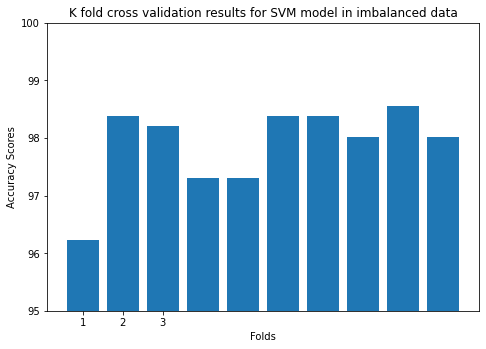

In [41]:
import matplotlib.pyplot as plt
fig = plt.figure()
axes = fig.add_axes([0,0,1,1])
axes = plt.gca()
axes.set_ylim([95,100])
# axes.set_xlim([0,4])
axes.xaxis.set_ticks(np.arange(0, 4, 1))
models = fold_list
accuracy_scores = accuracy_list
axes.bar(models,accuracy_scores)
plt.xlabel('Folds')
plt.ylabel('Accuracy Scores')
plt.title('K fold cross validation results for SVM model in imbalanced data')
fig.savefig('results/k_fold_cross_validation_result_svm_imbalanced_data.jpg', bbox_inches='tight')

# plt.savefig('results/comparision_chart.png')
plt.show()


# load the model from disk

In [42]:
loaded_model = pickle.load(open("models/SVM_spam_classification_model_imbalanced_data", 'rb'))

# Use loaded model for predictiing to new data

In [43]:
# Predict for unseen data
test_data = "Leave the keys in the locker."
cleaned_test_data = clean_text(test_data)
test_data_embedding = Tfidf_vect.transform([cleaned_test_data])

In [44]:
test_data_prediction = loaded_model.predict(test_data_embedding)[0].item()

In [45]:
def get_result(prediction_label):
    if prediction_label == 1:
        print ("Message is SPAM")
    else:
        print ("Message is NOT Spam")

In [46]:
get_result(test_data_prediction)

Message is NOT Spam
